In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()

In [2]:
db = pd.read_csv("Train.csv")
db.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


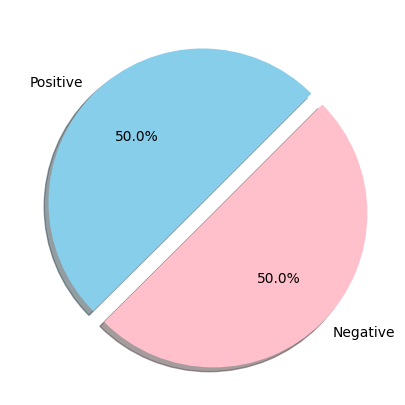

In [3]:
fig = plt.figure(figsize=(5,5))
colors = ["skyblue",'pink']
pos = db[db['label']==1]
neg = db[db['label']==0]
ck = [pos['label'].count(),neg['label'].count()]
legpie = plt.pie(ck,labels=["Positive","Negative"],autopct='%1.1f%%',shadow=True,colors=colors,startangle=45,explode=(0,0.1))

In [6]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
db['text']=db['text'].apply(preprocessor)

<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\hp\AppData\Local\Temp\ipykernel_14388\933599193.py:4: SyntaxWarning: invalid escape sequence '\)'
  emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
C:\Users\hp\AppData\Local\Temp\ipykernel_14388\933599193.py:5: SyntaxWarning: invalid escape sequence '\W'
  text=re.sub('[\W]+',' ',text.lower()) +\


In [7]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenize(text):
    return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive Words are as follows : 


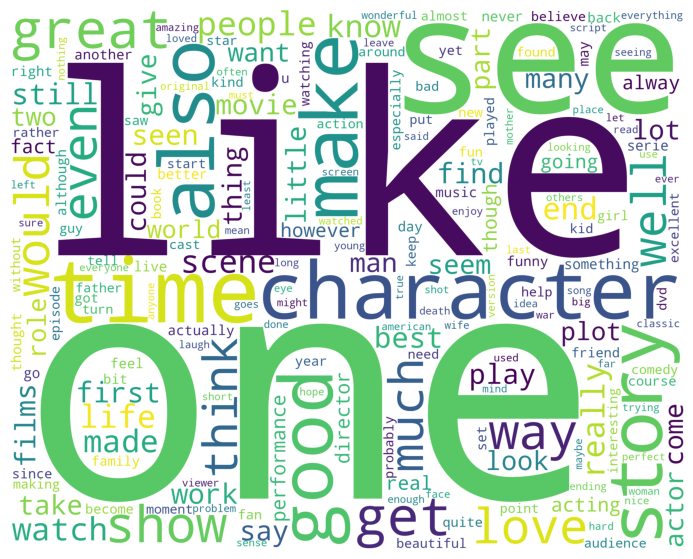

Negative Words are as follows : 


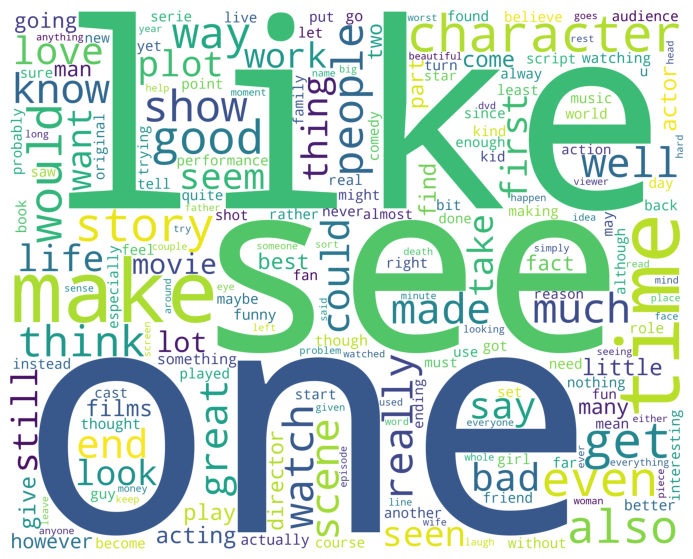

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from wordcloud import WordCloud
positivedata = db[db['label']==1]
positivedata = positivedata['text']
negdata = db[db['label']==0]
negdata = db['text']

def wordcloud_draw(data,color='white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if (word!='movie' and word!='film')])
    wordCloud = WordCloud(stopwords=stop,background_color=color,width=2500,height=2000).generate(cleaned_word)

    plt.figure(1,figsize=(10,7))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

print("Positive Words are as follows : ")
wordcloud_draw(positivedata,'white')
print("Negative Words are as follows : ")
wordcloud_draw(negdata)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=db.label.values
x=tfidf.fit_transform(db.text)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [16]:

from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   10.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   10.3s finished


Accuracy: 0.89105
